### Import statements

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
import sklearn.metrics as skmetrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from fairlearn.metrics import false_positive_rate
from fairlearn.metrics import false_negative_rate
from fairlearn.metrics import mean_prediction
from fairlearn.metrics import demographic_parity_difference
from fairlearn.metrics import count
from fairlearn.postprocessing import ThresholdOptimizer
import shap

warnings.filterwarnings('ignore')

### Reading in data and exploratory data analysis

In [3]:
creditdata =  pd.read_csv('/Users/guusjejuijn/Desktop/Scriptie/Programmeren/Scriptie/simplified_german_credit_data.csv', index_col=0)

In [4]:
creditdata.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
creditdata.shape

(1000, 10)

In [6]:
creditdata.info() # Check for missing values and data types 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
creditdata.isnull().sum() # Check number of missing values 

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [174]:
# Dealing with NaN's: we fill the missing values with the mode of all values of that column 
creditdata["Saving accounts"].fillna(creditdata['Saving accounts'].mode()[0], inplace=True)
creditdata["Checking account"].fillna(creditdata['Checking account'].mode()[0], inplace=True)
creditdata.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [175]:
creditdata.describe() # Describe numerical data 

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
print(creditdata['Job'].value_counts()) #Check whether we can transform job column into category instead of numerical

creditdata['Job'] = creditdata['Job'].astype('O')

2    630
1    200
3    148
0     22
Name: Job, dtype: int64


In [10]:
creditdata.describe(include='O') # Describe categorical data 

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,1000,817,606,1000,1000
unique,2,4,3,4,3,8,2
top,male,2,own,little,little,car,good
freq,690,630,713,603,274,337,700


percentage of customers predicted to be of good risk : 0.70
percentage of customers predicted to be of bad risk: 0.30


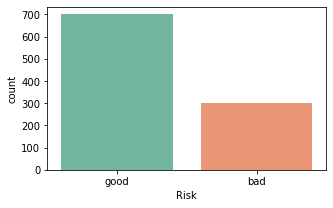

In [11]:
# Plot distribution of target variable (rating 1 = good, rating 2 = bad)
plt.figure(figsize=(5,3))
sn.countplot(creditdata['Risk'], palette = "Set2"); 

print('percentage of customers predicted to be of good risk : %.2f' % (creditdata['Risk'].value_counts()['good'] / len(creditdata)))
print('percentage of customers predicted to be of bad risk: %.2f' % (creditdata['Risk'].value_counts()['bad'] / len(creditdata)))

<AxesSubplot:xlabel='Job', ylabel='count'>

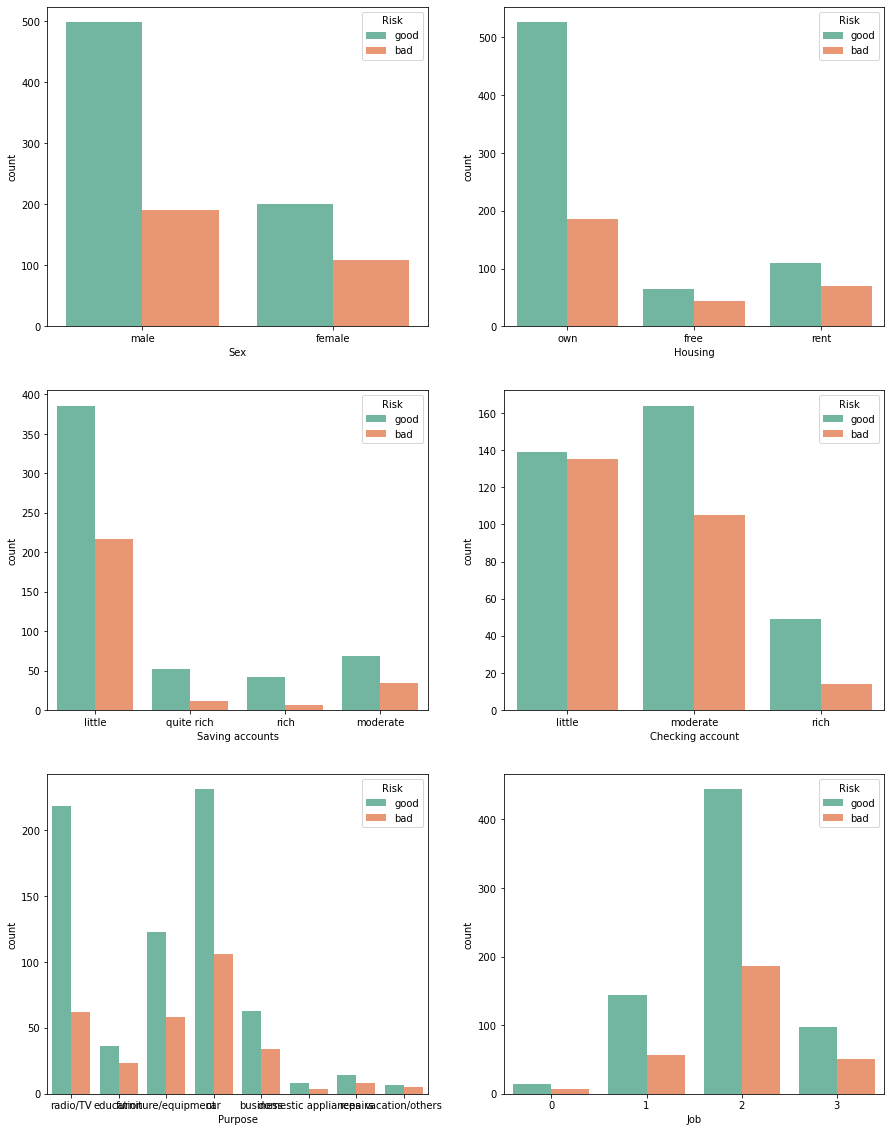

In [12]:
# Create count plots of all categorical attributes (rating 1 = good, rating 2 = bad)
fig, axs = plt.subplots(3,2,figsize=(15, 20))
sn.countplot(creditdata['Sex'], hue=creditdata.Risk, palette = "Set2", ax=axs[0,0])
sn.countplot(creditdata['Housing'], hue=creditdata.Risk, palette = "Set2", ax=axs[0,1])
sn.countplot(creditdata['Saving accounts'], hue=creditdata.Risk, palette = "Set2", ax=axs[1,0])
sn.countplot(creditdata['Checking account'], hue=creditdata.Risk, palette = "Set2", ax=axs[1,1])
sn.countplot(creditdata['Purpose'], hue=creditdata.Risk, palette = "Set2", ax=axs[2,0])
sn.countplot(creditdata['Job'], hue=creditdata.Risk, palette = "Set2", ax=axs[2,1])


[Text(0, 0, 'radio/TV'),
 Text(1, 0, 'education'),
 Text(2, 0, 'furniture/equipment'),
 Text(3, 0, 'car'),
 Text(4, 0, 'business'),
 Text(5, 0, 'domestic appliances'),
 Text(6, 0, 'repairs'),
 Text(7, 0, 'vacation/others')]

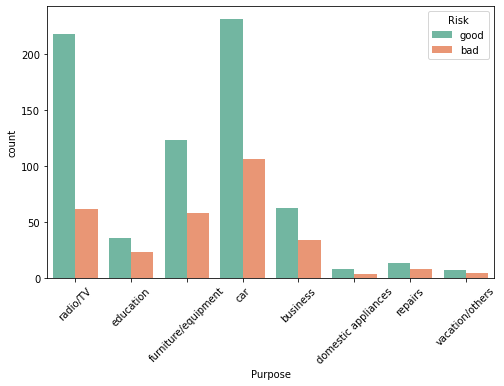

In [14]:
plt.figure(figsize=(8,5))
purpose = sn.countplot(creditdata['Purpose'], hue=creditdata.Risk, palette = "Set2")
purpose.set_xticklabels(purpose.get_xticklabels(), rotation=45)

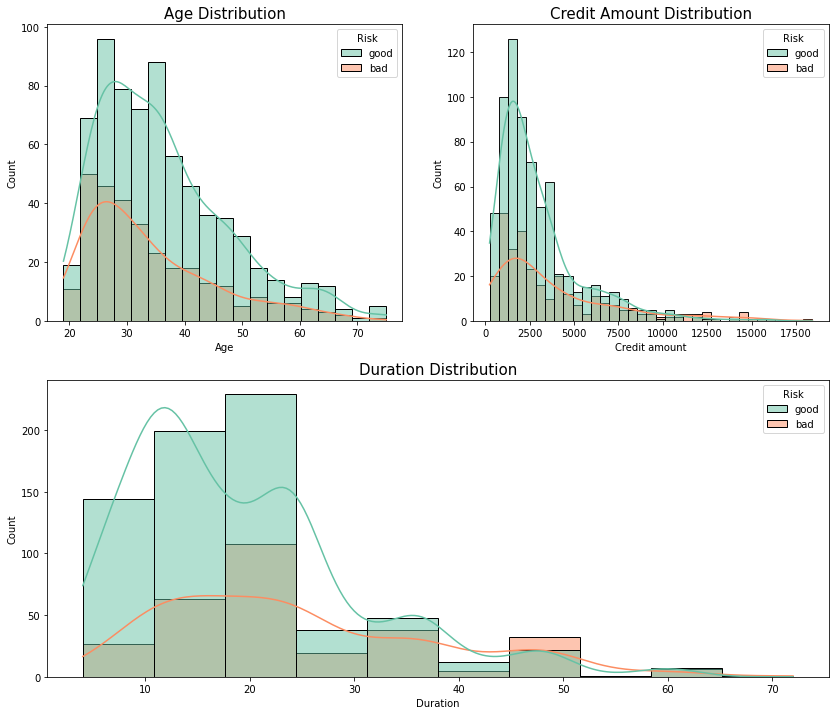

In [15]:
# Create histograms of all numerical attributes (rating 1 = good, rating 2 = bad)

plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sn.histplot(data=creditdata, x='Age', hue='Risk', palette='Set2', kde=True)
ax1.set_title("Age Distribution", fontsize=15)

plt.subplot(222)
ax2 = sn.histplot(data=creditdata, x='Credit amount', hue='Risk', palette='Set2', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=15)

plt.subplot(212)
ax3 = sn.histplot(data=creditdata, x='Duration', hue='Risk', palette='Set2', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=15)

plt.show()

#### Based on the analysis by Kamiran and Calders (2009), we discretize the numerical attribute 'age' into a categorical variable: we cut it off into the categories 'youth' (<25 years old) and 'adult' (25+ years old). In this way, young can be selected as the protected attribute

In [16]:
print(creditdata['Age'])

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: Age, Length: 1000, dtype: int64


In [17]:
# Categorize age into category 'young' (0-24) and 'adult' (25-75) (oldest person in dataset is 75) => young = 0, adult = 1 
creditdata['Age'] = (creditdata['Age'] > 24).astype(int) 

print(creditdata['Age'])
print()

print("Categories: ")
print(creditdata['Age'].value_counts())
print()
print(creditdata['Age'])

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Age, Length: 1000, dtype: int64

Categories: 
1    851
0    149
Name: Age, dtype: int64

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Age, Length: 1000, dtype: int64


#### Now we can plot the age distribution

In [18]:
creditdata['Age'] = creditdata['Age'].astype('O')

<AxesSubplot:xlabel='Age', ylabel='count'>

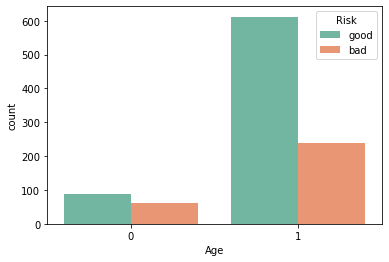

In [20]:
sn.countplot(creditdata.Age, hue=creditdata.Risk, palette = "Set2")

#### We can see that an adult has a higher chance of getting a good rating, compared to a young person. 

#### Look for disparate impact in the data set

In [21]:
# Look for disparate impact in the data set, using column info 

young = creditdata.loc[creditdata['Age'] == 0] # Subset of creditdata set containing only the young people
adult = creditdata.loc[creditdata['Age'] == 1] # Subset of creditdata set containing only the adults

favorable_young = young.loc[young['Risk'] == 'good'] # Young people who receive a good rating 
unfavorable_young = young.loc[young['Risk'] == 'bad'] # Young people who receive a bad rating
print("Number of young people who receive a good rating: ", len(favorable_young)) 
print("Number of young people who receive a bad rating: ", len(unfavorable_young)) 
prop_young_favorable = len(favorable_young)/len(young)
print("Proportion of young people receiving the favorable outcome: ", prop_young_favorable) 
print()

favorable_adult = adult.loc[adult['Risk'] == 'good']  # Adults who receive a good rating 
unfavorable_adult = adult.loc[adult['Risk'] == 'bad'] # Adults who receive a bad rating
print("Number of adults who receive a good rating: ", len(favorable_adult)) 
print("Number of adults who receive a bad rating: ", len(unfavorable_adult))
prop_adult_favorable = len(favorable_adult)/len(adult)
print("Proportion of adults receiving the favorable outcome: ", prop_adult_favorable)

print()

disparate_impact = prop_young_favorable / prop_adult_favorable
print("The disparate impact ratio between the unprivileged (young) group and privileged group (adults) is : %.2f " % disparate_impact)

Number of young people who receive a good rating:  88
Number of young people who receive a bad rating:  61
Proportion of young people receiving the favorable outcome:  0.5906040268456376

Number of adults who receive a good rating:  612
Number of adults who receive a bad rating:  239
Proportion of adults receiving the favorable outcome:  0.7191539365452408

The disparate impact ratio between the unprivileged (young) group and privileged group (adults) is : 0.82 


### Splitting  data into train and test set

In [22]:
# Change target-values into 0 (bad risk) and 1 (good rating) to make sure fairlearn-packages will work later on
creditdata['Risk'][creditdata['Risk']=='bad']=0
creditdata['Risk'][creditdata['Risk']=='good']=1
creditdata.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,male,2,own,NaN,little,1169,6,radio/TV,1
1,0,female,2,own,little,moderate,5951,48,radio/TV,0
2,1,male,1,own,little,NaN,2096,12,education,1
3,1,male,2,free,little,little,7882,42,furniture/equipment,1
4,1,male,2,free,little,little,4870,24,car,0


In [23]:
input_attributes = creditdata.iloc[:,0:20] # Split the data into input attributes and target attribute 
target_attribute = creditdata['Risk']

cat_columns = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose", "Job", "Age"]
num_columns = ["Duration", "Credit amount"]

X = input_attributes[cat_columns + num_columns]

# Split data into train and test set. Change target attribute into int, since now it is an object type which sklearn cannot recognize
x_train, x_test, y_train, y_test = train_test_split(X, target_attribute.astype('int'), test_size=0.25, random_state=42)


x_train.reset_index(drop=True, inplace=True) # Reset indices
x_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


### Preprocessing: one-hot encoding the categorical attributes, scale the numerical features, and define sensitive features

In [24]:
encoder = OneHotEncoder()
scaler=MinMaxScaler()

preprocessing = ColumnTransformer(
    [
        ("categorical", encoder, cat_columns),
        ("numerical", scaler, num_columns)
    ],
    verbose_feature_names_out=False,
)

In [25]:
age = x_test['Age'] # Define sensitive features 
age.value_counts()

1    209
0     41
Name: Age, dtype: int64

### Logistic Regression

In [26]:
unmitigated_lr = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", LogisticRegression(C=0.1,random_state=42)),
    ]
)
unmitigated_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose', 'Job', 'Age']),
                                                 ('numerical', MinMaxScaler(),
                                                  ['Duration',
                                                   'Credit amount'])],
                                   verbose_feature_names_out=False)),
                ('classifier', LogisticRegression(C=0.1, random_state=42))])

In [27]:
print(f"LR train accuracy: {unmitigated_lr.score(x_train, y_train):.3f}")
print(f"LR test accuracy: {unmitigated_lr.score(x_test, y_test):.3f}")

LR train accuracy: 0.745
LR test accuracy: 0.724


In [28]:
predictions_lr = unmitigated_lr.predict(x_test)
predictions_lr

print(skmetrics.classification_report(y_test, predictions_lr)) 

conf_matrix = skmetrics.confusion_matrix(y_test, predictions_lr)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.55      0.24      0.33        72
           1       0.75      0.92      0.83       178

    accuracy                           0.72       250
   macro avg       0.65      0.58      0.58       250
weighted avg       0.69      0.72      0.68       250

[[ 17  55]
 [ 14 164]]


In [29]:
# Show metrics per group
metrics = {"accuracy":accuracy_score, "selection rate": selection_rate, "mean prediction": mean_prediction,
           "false positive rate": false_positive_rate, "false negative rate": false_negative_rate, "count": count}
mf_lr = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=predictions_lr,
    sensitive_features=age)

print("Metrics by group: ") 
mf_lr.by_group

Metrics by group: 


,accuracy,selection rate,mean prediction,false positive rate,false negative rate,count
Age,,,,,,
0,0.634146,0.682927,0.682927,0.571429,0.259259,41.0
1,0.741627,0.913876,0.913876,0.810345,0.046358,209.0


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'mean prediction'}, xlabel='Age'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'count'}, xlabel='Age'>],
       [<AxesSubplot:xlabel='Age'>, <AxesSubplot:xlabel='Age'>,
        <AxesSubplot:xlabel='Age'>]], dtype=object)

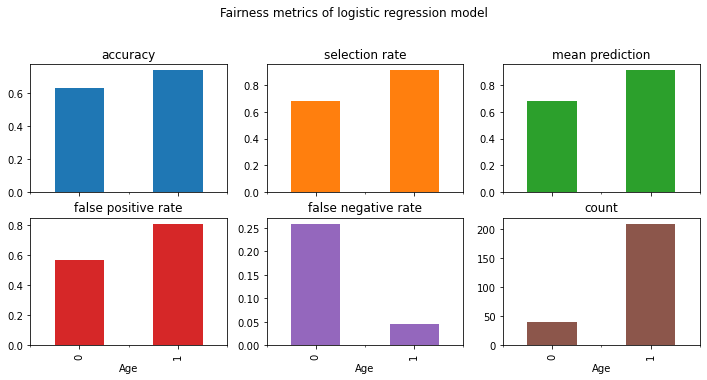

In [30]:
# Plot metrics by group
mf_lr.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Fairness metrics of logistic regression model",
)

### Investigate feature importance 

In [37]:
featureimportance = pd.DataFrame(data={
                                'Feature': preprocessing.get_feature_names_out(),
                                 'Importance': unmitigated_lr['classifier'].coef_[0]})
featureimportance = featureimportance.sort_values(by='Importance', ascending=False) # Sorted dataframe of all features and their coefficients

pd.qcut(featureimportance['Importance'], q=11) #Divide all features up into 11 buckets (+++++ to -----)
binned = pd.qcut(featureimportance['Importance'], q=11)
binned_df = pd.DataFrame(binned)

binned_df['Feature'] = featureimportance['Feature']
print(binned_df)

           Importance                      Feature
13     (0.244, 0.765]         Checking account_nan
19     (0.244, 0.765]             Purpose_radio/TV
3      (0.244, 0.765]                  Housing_own
8      (0.164, 0.244]         Saving accounts_rich
12     (0.164, 0.244]        Checking account_rich
27     (0.164, 0.244]                        Age_1
9      (0.153, 0.164]          Saving accounts_nan
1      (0.153, 0.164]                     Sex_male
18    (0.0867, 0.153]  Purpose_furniture/equipment
23    (0.0867, 0.153]                        Job_1
7     (0.0867, 0.153]   Saving accounts_quite rich
22   (-0.036, 0.0867]                        Job_0
21   (-0.036, 0.0867]      Purpose_vacation/others
24   (-0.036, 0.0867]                        Job_2
15  (-0.0423, -0.036]                  Purpose_car
20  (-0.0423, -0.036]              Purpose_repairs
16  (-0.113, -0.0423]  Purpose_domestic appliances
4   (-0.113, -0.0423]                 Housing_rent
14  (-0.113, -0.0423]          

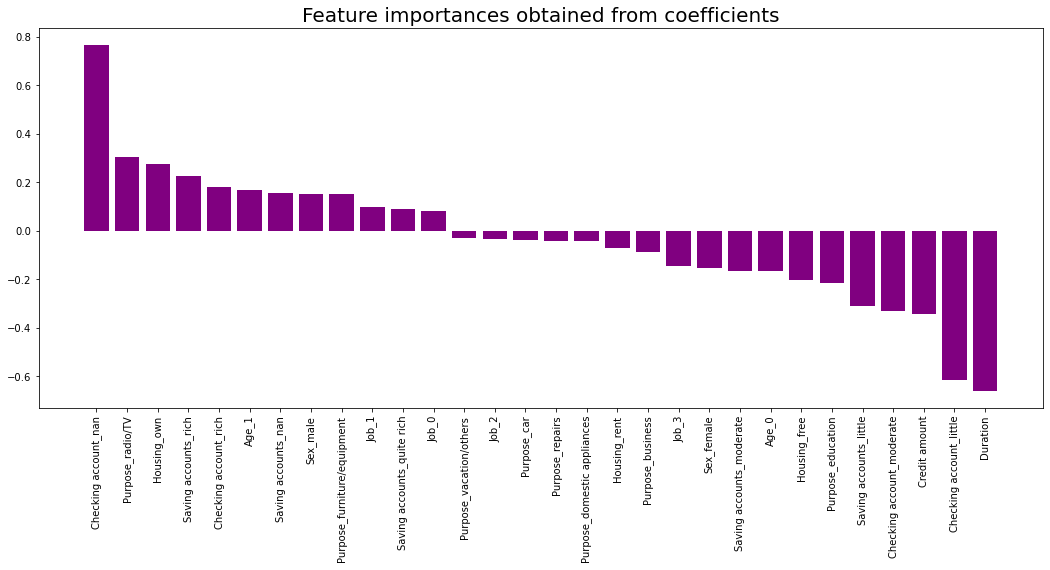

In [34]:
# Plot of all features and their belonging coefficients 
plt.figure(figsize=(18,7))
plt.bar(x=featureimportance['Feature'], height=featureimportance['Importance'], color='purple')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Bias mitigation 

In [38]:
# Postprocessing for demographic parity 

postprocess = ThresholdOptimizer(estimator=unmitigated_lr, constraints="demographic_parity", 
                                     objective="accuracy_score",prefit=True,predict_method='predict_proba')

postprocess.fit(x_train, y_train, sensitive_features = x_train['Age'])

ThresholdOptimizer(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               OneHotEncoder(),
                                                                               ['Sex',
                                                                                'Housing',
                                                                                'Saving '
                                                                                'accounts',
                                                                                'Checking '
                                                                                'account',
                                                                                'Purpose',
                                                                                'Job',
                                                                                'Age']),
                                                                              ('numerical',
                                                                               MinMaxScaler(),
                                                                               ['Duration',
                                                                                'Credit '
                                                                                'amount'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              LogisticRegression(C=0.1,
                                                                 random_state=42))]),
                   predict_method='predict_proba', prefit=True)

In [39]:
predictions_lr_postpr = postprocess.predict(x_test, sensitive_features=age)

print(skmetrics.classification_report(y_test, predictions_lr_postpr)) 
print()
conf_matrix = skmetrics.confusion_matrix(y_test, predictions_lr_postpr)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.53      0.33      0.41        72
           1       0.77      0.88      0.82       178

    accuracy                           0.72       250
   macro avg       0.65      0.61      0.62       250
weighted avg       0.70      0.72      0.70       250


[[ 24  48]
 [ 21 157]]


In [40]:
# Show metrics by group after mitigation
mf_lr_postpr = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=predictions_lr_postpr,
    sensitive_features=age)

print("Metrics by group: ") 
mf_lr_postpr.by_group

Metrics by group: 


,accuracy,selection rate,mean prediction,false positive rate,false negative rate,count
Age,,,,,,
0,0.658537,0.804878,0.804878,0.714286,0.148148,41.0
1,0.736842,0.822967,0.822967,0.655172,0.112583,209.0


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'mean prediction'}, xlabel='Age'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'count'}, xlabel='Age'>],
       [<AxesSubplot:xlabel='Age'>, <AxesSubplot:xlabel='Age'>,
        <AxesSubplot:xlabel='Age'>]], dtype=object)

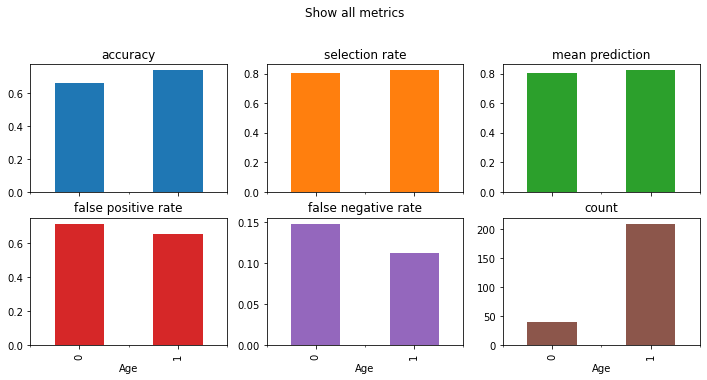

In [41]:
# Plot metrics by group after mitigation 
mf_lr_postpr.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [42]:
# Postprocessing for equality of opportunity

postprocess_eqo = ThresholdOptimizer(estimator=unmitigated_lr, constraints="false_negative_rate_parity", 
                                     objective="accuracy_score",prefit=True,predict_method='predict_proba')

postprocess_eqo.fit(x_train, y_train, sensitive_features = x_train['Age'])


ThresholdOptimizer(constraints='false_negative_rate_parity',
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               OneHotEncoder(),
                                                                               ['Sex',
                                                                                'Housing',
                                                                                'Saving '
                                                                                'accounts',
                                                                                'Checking '
                                                                                'account',
                                                                                'Purpose',
                                                                                'Job',
                                                                                'Age']),
                                                                              ('numerical',
                                                                               MinMaxScaler(),
                                                                               ['Duration',
                                                                                'Credit '
                                                                                'amount'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              LogisticRegression(C=0.1,
                                                                 random_state=42))]),
                   predict_method='predict_proba', prefit=True)

In [43]:
predictions_lr_postpr_eqo = postprocess_eqo.predict(x_test, sensitive_features=age)

print(skmetrics.classification_report(y_test, predictions_lr_postpr_eqo)) 
print()
conf_matrix = skmetrics.confusion_matrix(y_test, predictions_lr_postpr_eqo)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.54      0.35      0.42        72
           1       0.77      0.88      0.82       178

    accuracy                           0.73       250
   macro avg       0.66      0.61      0.62       250
weighted avg       0.70      0.73      0.71       250


[[ 25  47]
 [ 21 157]]


In [44]:
# Show metrics by group after mitigation
mf_lr_postpr_eqo = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=predictions_lr_postpr_eqo,
    sensitive_features=age)

print("Metrics by group: ") 
mf_lr_postpr_eqo.by_group

Metrics by group: 


,accuracy,selection rate,mean prediction,false positive rate,false negative rate,count
Age,,,,,,
0,0.682927,0.780488,0.780488,0.642857,0.148148,41.0
1,0.736842,0.822967,0.822967,0.655172,0.112583,209.0


array([[<AxesSubplot:title={'center':'accuracy'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'selection rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'mean prediction'}, xlabel='Age'>],
       [<AxesSubplot:title={'center':'false positive rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'false negative rate'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'count'}, xlabel='Age'>],
       [<AxesSubplot:xlabel='Age'>, <AxesSubplot:xlabel='Age'>,
        <AxesSubplot:xlabel='Age'>]], dtype=object)

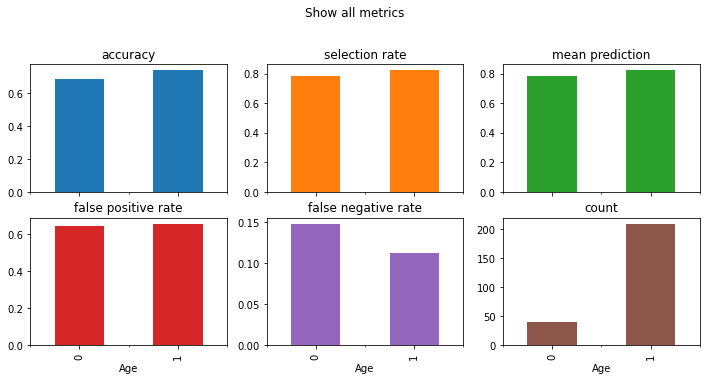

In [45]:
# Plot metrics by group after mitigation 
mf_lr_postpr_eqo.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

### 